In [61]:
import sys
sys.path.insert(0,'/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/github/Omphalos')
sys.path.insert(1,'/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/github')

from importlib import reload

import numpy as np

# Import Omphalos modules.
from omphalos import file_methods as fm
from omphalos import attributes as attr
from omphalos import labels as lbls

import matplotlib.pyplot as plt

import xgboost as xgb

%matplotlib inline

In [62]:
# Load the XGBoost model trained earlier
bst = xgb.Booster()
bst.load_model(fname='bcm_xgbModel_4-1.json')

In [96]:
# The variable as varied between lower and upper bounds
variable_range_lower, variable_range_upper = 0, 3.0E-4
# The number of ypred value samples desired
samples = 100
# The number dimensions (i.e. predictors i.e. ca, fe, mg)
dims = 3
# The controlled values in the base .in file
controlled_ca_val = 1.0922841574764136E-4
controlled_fe_val = 2.0458518197753574E-4
controlled_mg_val = 2.8166497794217927E-4

# The normalization function used
def NormalizeData(data, lower, upper):
    return (data - lower) / (upper - lower)

# Normalization values used for x's (i.e. Ca, Mg, Fe)
x_upper_normalizer = 3.0E-4 # max(data)
x_lower_normalizer = 0 # min(data)

# Normalization values used for y (i.e. Carbonate Volume Change)
y_upper_normalizer = 0.0019470942119 # max(data)
y_lower_normalizer = 0.0019468777495 # min(data)

xpred = np.linspace(variable_range_lower, variable_range_upper, samples)
xpred = xpred.reshape(-1,1)
xpred = NormalizeData(xpred, x_lower_normalizer, x_upper_normalizer)
ypred = np.linspace(variable_range_lower, variable_range_upper, samples)
ypred = ypred.reshape(-1,1)
ypred = NormalizeData(ypred, x_lower_normalizer, x_upper_normalizer)
X,Y = np.meshgrid(xpred,ypred)
Z = np.empty_like(X)

row = 0
for X_row,Y_row in zip(X,Y):
    column = 0
    for X_scalar,Y_scalar in zip(X_row,Y_row):
        zpred = bst.predict(xgb.DMatrix(np.array([[X_scalar,Y_scalar,controlled_mg_val]])))
        Z[row,column] = zpred
        column += 1
    row += 1

# def AbnormalizeData(normalised_data, lower, upper):
#     return (normalised_data * (upper - lower)) + lower

# row = 0
# for X_row,Y_row,Z_row in zip(X,Y,Z):
#     column = 0
#     for X_scalar,Y_scalar,Z_scalar in zip(X_row,Y_row,Z_row):
#         X[row,column] = AbnormalizeData(X_scalar, x_lower_normalizer, x_upper_normalizer)
#         Y[row,column] = AbnormalizeData(Y_scalar, x_lower_normalizer, x_upper_normalizer)
#         Z[row,column] = AbnormalizeData(Z_scalar, y_lower_normalizer, y_upper_normalizer)
#         column += 1
#     row += 1

Text(0.5, 0, 'Carbonates (Norm.)')

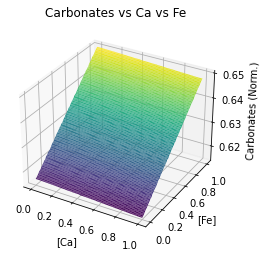

In [97]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Carbonates vs Ca vs Fe')
ax.set_xlabel('[Ca]')
ax.set_ylabel('[Fe]')
ax.set_zlabel('Carbonates (Norm.)')

In [98]:
# The variable as varied between lower and upper bounds
variable_range_lower, variable_range_upper = 0, 3.0E-4
# The number of ypred value samples desired
samples = 100
# The number dimensions (i.e. predictors i.e. ca, fe, mg)
dims = 3
# The controlled values in the base .in file
controlled_ca_val = 1.0922841574764136E-4
controlled_fe_val = 2.0458518197753574E-4
controlled_mg_val = 2.8166497794217927E-4

# The normalization function used
def NormalizeData(data, lower, upper):
    return (data - lower) / (upper - lower)

# Normalization values used for x's (i.e. Ca, Mg, Fe)
x_upper_normalizer = 3.0E-4 # max(data)
x_lower_normalizer = 0 # min(data)

# Normalization values used for y (i.e. Carbonate Volume Change)
y_upper_normalizer = 0.0019470942119 # max(data)
y_lower_normalizer = 0.0019468777495 # min(data)

xpred = np.linspace(variable_range_lower, variable_range_upper, samples)
xpred = xpred.reshape(-1,1)
xpred = NormalizeData(xpred, x_lower_normalizer, x_upper_normalizer)
ypred = np.linspace(variable_range_lower, variable_range_upper, samples)
ypred = ypred.reshape(-1,1)
ypred = NormalizeData(ypred, x_lower_normalizer, x_upper_normalizer)
X,Y = np.meshgrid(xpred,ypred)
Z = np.empty_like(X)

row = 0
for X_row,Y_row in zip(X,Y):
    column = 0
    for X_scalar,Y_scalar in zip(X_row,Y_row):
        zpred = bst.predict(xgb.DMatrix(np.array([[X_scalar, controlled_fe_val, Y_scalar]])))
        Z[row,column] = zpred
        column += 1
    row += 1

Text(0.5, 0, 'Carbonates (Norm.)')

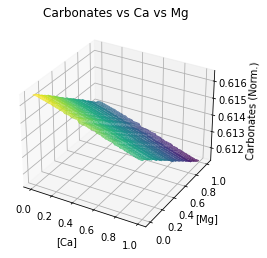

In [99]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Carbonates vs Ca vs Mg')
ax.set_xlabel('[Ca]')
ax.set_ylabel('[Mg]')
ax.set_zlabel('Carbonates (Norm.)')

In [100]:
# The variable as varied between lower and upper bounds
variable_range_lower, variable_range_upper = 0, 3.0E-4
# The number of ypred value samples desired
samples = 100
# The number dimensions (i.e. predictors i.e. ca, fe, mg)
dims = 3
# The controlled values in the base .in file
controlled_ca_val = 1.0922841574764136E-4
controlled_fe_val = 2.0458518197753574E-4
controlled_mg_val = 2.8166497794217927E-4

# The normalization function used
def NormalizeData(data, lower, upper):
    return (data - lower) / (upper - lower)

# Normalization values used for x's (i.e. Ca, Mg, Fe)
x_upper_normalizer = 3.0E-4 # max(data)
x_lower_normalizer = 0 # min(data)

# Normalization values used for y (i.e. Carbonate Volume Change)
y_upper_normalizer = 0.0019470942119 # max(data)
y_lower_normalizer = 0.0019468777495 # min(data)

xpred = np.linspace(variable_range_lower, variable_range_upper, samples)
xpred = xpred.reshape(-1,1)
xpred = NormalizeData(xpred, x_lower_normalizer, x_upper_normalizer)
ypred = np.linspace(variable_range_lower, variable_range_upper, samples)
ypred = ypred.reshape(-1,1)
ypred = NormalizeData(ypred, x_lower_normalizer, x_upper_normalizer)
X,Y = np.meshgrid(xpred,ypred)
Z = np.empty_like(X)

row = 0
for X_row,Y_row in zip(X,Y):
    column = 0
    for X_scalar,Y_scalar in zip(X_row,Y_row):
        zpred = bst.predict(xgb.DMatrix(np.array([[controlled_ca_val, X_scalar, Y_scalar]])))
        Z[row,column] = zpred
        column += 1
    row += 1

Text(0.5, 0, 'Carbonates (Norm.)')

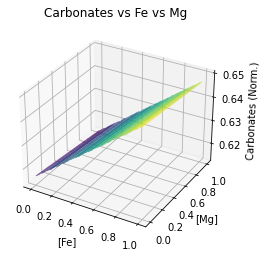

In [101]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('Carbonates vs Fe vs Mg')
ax.set_xlabel('[Fe]')
ax.set_ylabel('[Mg]')
ax.set_zlabel('Carbonates (Norm.)')